In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#random forest workshop with najory help from https://github.com/schmiani/RandomForestWorkshop/blob/master/airline.ipynb

In [4]:
df = pd.read_csv('data-0.1m.csv')

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N


In [6]:
df.shape

(100000, 10)

In [7]:
#look for nans 
df.isnull().values.any()
#are there none?!

False

In [ ]:
#explore what values are in each column, really clean dataset!!!

In [10]:
df.Year.unique()

array([2006, 2004, 2005, 2007])

In [11]:
df.dep_delayed_15min.unique()

array(['N', 'Y'], dtype=object)

In [8]:
df.UniqueCarrier.unique()

array(['AA', 'US', 'OO', 'DL', 'OH', 'NW', 'WN', 'UA', 'XE', 'HP', '9E',
       'EV', 'TZ', 'MQ', 'B6', 'DH', 'CO', 'YV', 'FL', 'HA', 'AQ', 'AS',
       'F9'], dtype=object)

In [9]:
df.Origin.unique()

array(['FAT', 'SAN', 'SBP', 'PHL', 'ATL', 'DTW', 'PDX', 'PBI', 'LAX',
       'SLC', 'EWR', 'RAP', 'ROC', 'MDT', 'BNA', 'DEN', 'DCA', 'PWM',
       'SFO', 'ISP', 'DAL', 'ORD', 'MCO', 'BGR', 'SJT', 'CLE', 'PHX',
       'SJC', 'TUP', 'CVG', 'BUF', 'ELP', 'ICT', 'TYS', 'PIT', 'MTJ',
       'BOI', 'DFW', 'IAH', 'JFK', 'SEA', 'MEM', 'CMH', 'ILM', 'MDW',
       'MIA', 'JAN', 'BDL', 'HNL', 'OKC', 'RDU', 'MCI', 'KOA', 'BWI',
       'IAD', 'AUS', 'OAK', 'SYR', 'MSN', 'LAS', 'ORF', 'SMF', 'LGA',
       'LIT', 'RIC', 'GRR', 'CLT', 'RNO', 'ONT', 'XNA', 'PVD', 'TPA',
       'GSP', 'PSP', 'JAX', 'SAT', 'BOS', 'BTR', 'STL', 'SAV', 'FLL',
       'OME', 'GRB', 'ABQ', 'MSY', 'EGE', 'LBB', 'OMA', 'CHO', 'SGF',
       'GJT', 'MSP', 'MOB', 'LGB', 'SNA', 'DSM', 'MFR', 'ALB', 'PNS',
       'OAJ', 'LNK', 'BUR', 'SHV', 'ROA', 'GPT', 'ANC', 'MRY', 'MHT',
       'VPS', 'BTV', 'GSO', 'MKE', 'CHS', 'HPN', 'OGG', 'ACT', 'HOU',
       'TVC', 'HSV', 'PHF', 'EUG', 'ABE', 'CDV', 'AVL', 'IND', 'RSW',
       'AVP', 'MGM',

In [13]:
df2=pd.get_dummies(df) #this automatically gets dummies only for categorical columns

In [14]:
df2.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,dep_delayed_15min_N,dep_delayed_15min_Y
0,2006,1316,1313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2004,1242,2369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2006,1302,191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2005,1138,665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2005,1438,859,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
#hold-out where year is 2007 for validation
dfval = df2[df2.Year == 2007]
dfrest = df2[df2.Year != 2007]

In [16]:
dfrest.head() 
#will now split this into test and train and also take out delay as target

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,dep_delayed_15min_N,dep_delayed_15min_Y
0,2006,1316,1313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2004,1242,2369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2006,1302,191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2005,1138,665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2005,1438,859,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
#keep delayed as target
dfrestarg =  dfrest['dep_delayed_15min_Y']
dfvaltarg = dfval['dep_delayed_15min_Y']

In [18]:
#keep the rest (excluding the last two columns of targets) as features
dfrest2 = dfrest.iloc[:, :-2]
dfval2 = dfval.iloc[:, :-2]


In [20]:
#split to test and train
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(dfrest2, dfrestarg, test_size=0.3, random_state=0)

In [21]:
#try randomforest and try making AUC ROC
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
print 'train', rf.score(X_train,y_train)
print 'test', rf.score(X_test,y_test)

train 0.978440649281
test 0.809019519856


In [95]:
rf.predict_proba(X_train)

array([[ 1. ,  0. ],
       [ 0.3,  0.7],
       [ 0.2,  0.8],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.9,  0.1]])

In [96]:
rf.predict_proba(X_test)[:, 1]

array([ 0.1,  0.2,  0.3, ...,  0.1,  0.1,  0.1])

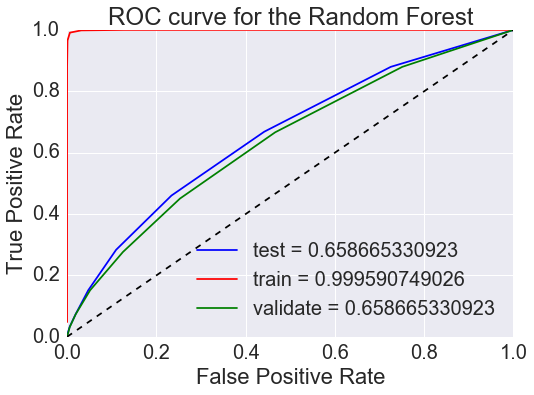

In [24]:
from sklearn import svm, metrics, grid_search, linear_model, datasets
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), 
                                         rf.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(y_train), 
                                         rf.predict_proba(X_train)[:, 1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(dfvaltarg), 
                                         rf.predict_proba(dfval2)[:, 1])
sns.set(font_scale=2)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='test = %s' % auc, color = 'b')
auc2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='train = %s' % auc2, color = 'r')
auc3 = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='validate = %s' % auc, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the Random Forest')
plt.show()
#overfits using out of the box random forest

In [25]:
#now re-do with gridsearch and validation, not sure how to pick these parameters
param_grid = {"max_depth": [15,20],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators": [50]}
parasearch = GridSearchCV(rf, param_grid, scoring = 'roc_auc', cv=5)
parasearch.fit(X_train, y_train)
parasearch.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
best = parasearch.best_estimator_
best.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

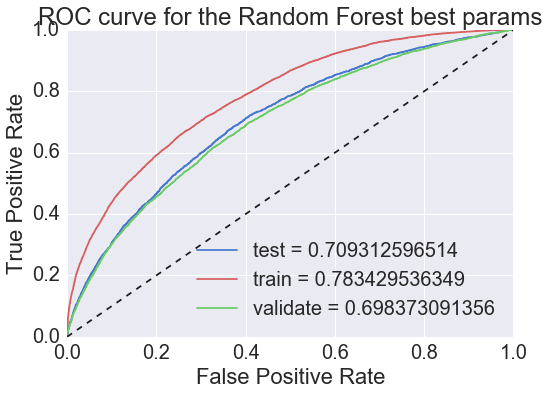

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), 
                                         best.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(y_train), 
                                         best.predict_proba(X_train)[:, 1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(dfvaltarg), 
                                         best.predict_proba(dfval2)[:, 1])
sns.set(font_scale=2)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='test = %s' % auc, color = 'b')
auc2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='train = %s' % auc2, color = 'r')
auc3 = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='validate = %s' % auc3, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the Random Forest best params')
plt.show()

In [30]:
#look at what features are important
df_importance = pd.DataFrame({'feature': X_train.columns, 'importance' : best.feature_importances_})
df_importance.head()

,feature,importance
0,Year,0.019151
1,DepTime,0.361302
2,Distance,0.038162
3,Month_c-1,0.004658
4,Month_c-10,0.003890


In [37]:
result = df_importance.sort(['importance'], ascending=False).reset_index()
result.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,feature,importance
0,1,DepTime,0.361302
1,2,Distance,0.038162
2,0,Year,0.019151
3,6,Month_c-12,0.018451
4,289,Origin_ORD,0.017399


In [38]:
y= result['feature'][0:20]
x = result['importance'][0:20]

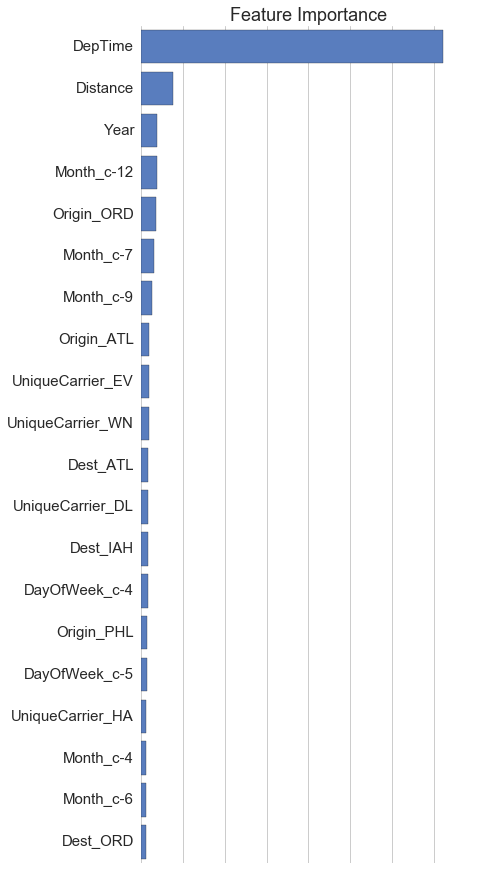

In [39]:

sns.set(style="whitegrid",font_scale=1.5)
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("muted")
sns.barplot(x=x, y=y, color="b")
ax.set(xticklabels=[],ylabel='',xlabel='',title='Feature Importance')
sns.despine(left=True, bottom=True)

In [69]:
#try with different model parameters and take a subset of the data to
#run the modeling faster
import random
features = df2.iloc[:, :-2]
subset = random.sample(list(features.index),10000)

In [89]:
subset #just random index numbers


[1400,
 87390,
 70460,
 54397,
 74230,
 32755,
 84382,
 92247,
 77499,
 20516,
 30669,
 93059,
 21599,
 85475,
 9127,
 64276,
 9128,
 28106,
 26047,
 17435,
 82257,
 90778,
 51898,
 50735,
 23875,
 47922,
 46491,
 704,
 26470,
 68147,
 78773,
 31668,
 86076,
 79078,
 28817,
 67642,
 58824,
 17066,
 88714,
 37893,
 48364,
 50959,
 73356,
 24359,
 39031,
 26226,
 54621,
 134,
 87782,
 2051,
 65384,
 75619,
 6885,
 42259,
 42054,
 11565,
 28027,
 56285,
 67518,
 96975,
 94264,
 60128,
 12810,
 84451,
 93066,
 38573,
 77963,
 82355,
 20955,
 34790,
 88217,
 49351,
 66022,
 38394,
 21409,
 42448,
 72215,
 63776,
 20322,
 95647,
 37424,
 79565,
 98524,
 72172,
 3626,
 53158,
 94001,
 88294,
 29147,
 89009,
 77134,
 94158,
 18767,
 63543,
 85766,
 69979,
 43833,
 56119,
 22404,
 61076,
 68741,
 76432,
 51750,
 78691,
 12795,
 23481,
 26027,
 93102,
 20046,
 17362,
 9650,
 56247,
 23122,
 88914,
 77161,
 78043,
 56567,
 37592,
 22275,
 38134,
 62984,
 93556,
 56713,
 48873,
 74793,
 15091,
 78

In [74]:
features.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,2006,1316,1313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,1242,2369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,1302,191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005,1138,665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005,1438,859,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_sub = features.loc[subset]
X_sub = X_sub.iloc[:, :-2]
Y_sub = df2['dep_delayed_15min_Y'].loc[subset]

In [77]:
Y_sub.head()

1400     0.0
87390    0.0
70460    1.0
54397    0.0
74230    0.0
Name: dep_delayed_15min_Y, dtype: float64

In [91]:
X_sub.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_TYR,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK
1400,2005,1220,599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87390,2004,1013,428,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70460,2005,1735,272,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54397,2004,1753,238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74230,2004,1930,383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#these parameters from https://github.com/schmiani/RandomForestWorkshop/blob/master/airline.ipynb
parameters = {'n_estimators': [10,100,500],'max_depth':[5,15,25],'min_samples_leaf':[10,20,50]}
rf = RandomForestClassifier()
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2)


In [81]:
model_cv_grid.fit(X_sub,Y_sub)
best_model = model_cv_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.2s
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.2s
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.1s
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -   0.6s
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -   0.8s
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -   0.8s
[CV] n_estimators=500, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_est

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   51.4s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  2.3min finished


In [82]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
#test new best_model
X_train_sub, X_test_sub, y_train_sub, y_test_sub=cross_validation.train_test_split(X_sub, Y_sub)

In [84]:
best_model.fit(X_train_sub, y_train_sub)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
y_probtrainsub = best_model.predict_proba(X_train_sub)
y_probtestsub = best_model.predict_proba(X_test_sub)
#fpr_train_sub, tpr_train_sub, _ = metrics.roc_curve(y_train_sub,y_probtrainsub[:,1])
#roc_auc_train_sub = metrics.auc(fpr_train_sub, tpr_train_sub)
#fpr_test_sub, tpr_test_sub, _ = metrics.roc_curve(y_test_sub,y_prob_testsub[:,1])
#roc_auc_test_sub = metrics.auc(fpr_test_sub, tpr_test_sub)

In [86]:
fpr_train_sub, tpr_train_sub, _ = metrics.roc_curve(y_train_sub,y_probtrainsub[:,1])
roc_auc_train_sub = metrics.auc(fpr_train_sub, tpr_train_sub)

In [87]:
fpr_test_sub, tpr_test_sub, _ = metrics.roc_curve(y_test_sub,y_probtestsub[:,1])
roc_auc_test_sub = metrics.auc(fpr_test_sub, tpr_test_sub)

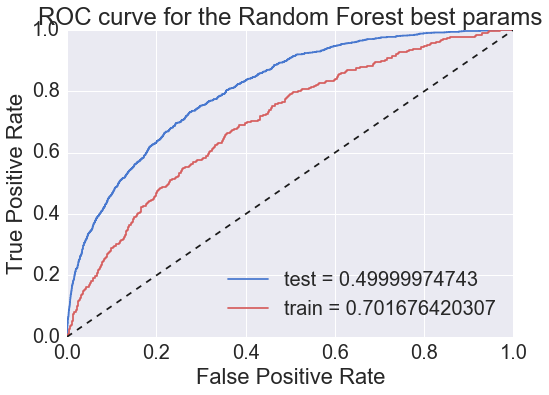

In [88]:
sns.set(font_scale=2)
auc = metrics.auc(tpr_train_sub, tpr_train_sub)
plt.plot(fpr_train_sub, tpr_train_sub, label='test = %s' % auc, color = 'b')
auc2 = metrics.auc(fpr_test_sub, tpr_test_sub)
plt.plot(fpr_test_sub, tpr_test_sub, label='train = %s' % auc2, color = 'r')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the Random Forest best params')

plt.show()
#this looks bad!!!but try on whole dataset could be due to random sampling

In [92]:
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

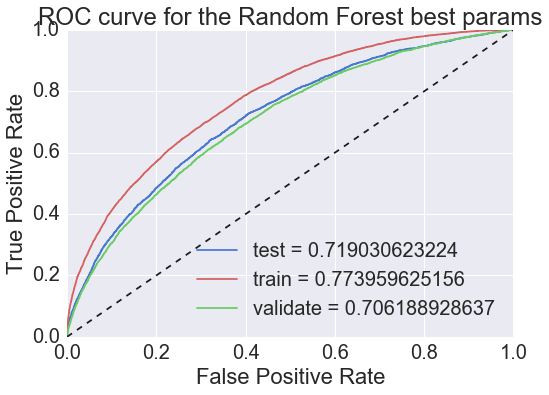

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), 
                                         best_model.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(y_train), 
                                         best_model.predict_proba(X_train)[:, 1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(dfvaltarg), 
                                         best_model.predict_proba(dfval2)[:, 1])
sns.set(font_scale=2)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='test = %s' % auc, color = 'b')
auc2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='train = %s' % auc2, color = 'r')
auc3 = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='validate = %s' % auc3, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the Random Forest best params')
plt.show()

In [96]:
#do more on full dataset with slightly different parameters
parameters = {'n_estimators': [200],'max_depth':[100],'min_samples_leaf':[5]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)
model_cv_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 - 1.3min[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 - 1.3min[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 - 1.3min




[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200], 'max_depth': [100], 'min_samples_leaf': [5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [97]:
model_cv_grid.grid_scores_

[mean: 0.72653, std: 0.00296, params: {'n_estimators': 200, 'max_depth': 100, 'min_samples_leaf': 5}]

In [98]:
best_model_100k = model_cv_grid.best_estimator_

In [99]:
best_model_100k

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
df_importance_100k = pd.DataFrame({'feature': X_train.columns, 'importance' : best_model_100k.feature_importances_})
df_importance_100k.sort_index().head()

,feature,importance
0,Year,0.018125
1,DepTime,0.318403
2,Distance,0.060396
3,Month_c-1,0.005678
4,Month_c-10,0.004772


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


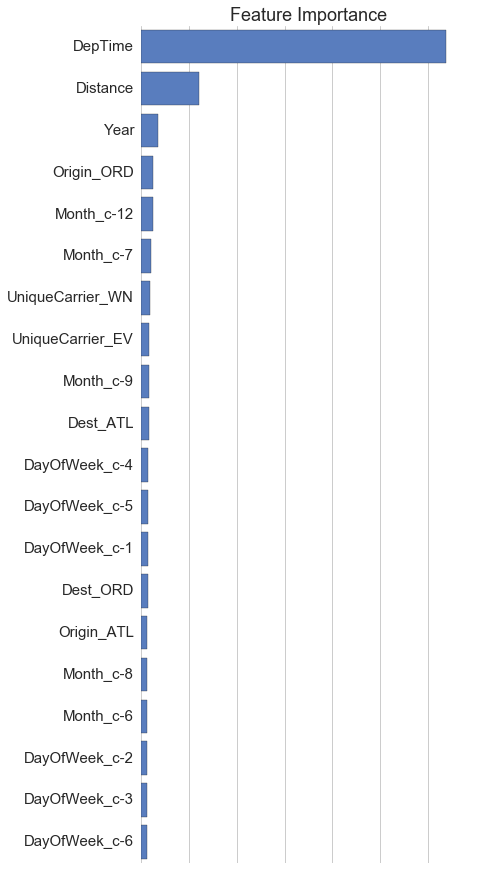

In [103]:
result = df_importance_100k.sort(['importance'], ascending=False).reset_index()
result.head()
y= result['feature'][0:20]
x = result['importance'][0:20]

sns.set(style="whitegrid",font_scale=1.5)
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("muted")
sns.barplot(x=x, y=y, color="b")
ax.set(xticklabels=[],ylabel='',xlabel='',title='Feature Importance')
sns.despine(left=True, bottom=True)

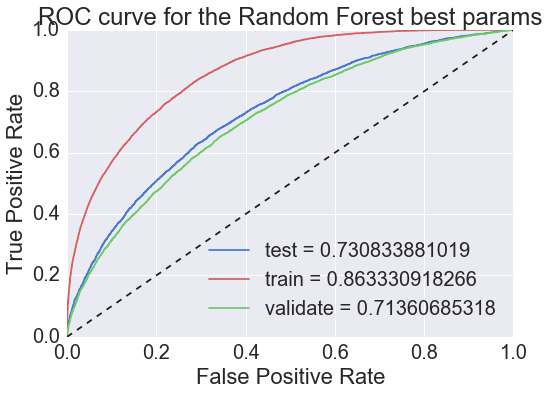

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), 
                                         best_model_100k.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(y_train), 
                                         best_model_100k.predict_proba(X_train)[:, 1])
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(dfvaltarg), 
                                         best_model_100k.predict_proba(dfval2)[:, 1])
sns.set(font_scale=2)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='test = %s' % auc, color = 'b')
auc2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='train = %s' % auc2, color = 'r')
auc3 = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='validate = %s' % auc3, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.title('ROC curve for the Random Forest best params')
plt.show()

In [109]:
#look at precision and recall
precision_val, recall_val, thresholds_val = metrics.precision_recall_curve(dfvaltarg,best_model_100k.predict_proba(dfval2)[:,1])
y_prob_val_100k = best_model_100k.predict_proba(dfval2)

In [110]:
thresholds_val = np.append(thresholds_val, 1)
queue_rate_val = []  
for threshold in thresholds_val:  
    queue_rate_val.append((y_prob_val_100k[:,1] >= threshold).mean())

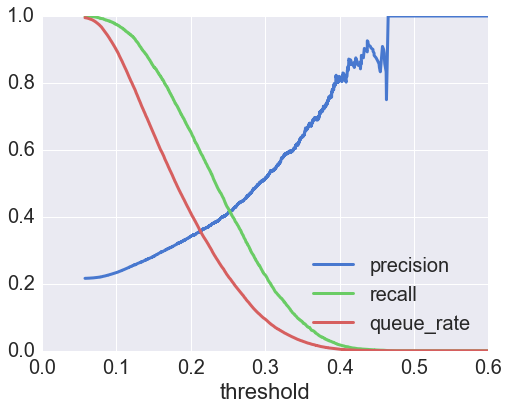

In [111]:
plt.figure(figsize=(8,6))
plt.plot(thresholds_val, precision_val, color = 'b', linewidth=3.0)  
plt.plot(thresholds_val, recall_val, color = 'g', linewidth=3.0)  
plt.plot(thresholds_val, queue_rate_val, color = 'r', linewidth=3.0)
leg = plt.legend(('precision', 'recall', 'queue_rate'),loc="lower right")
plt.xlabel('threshold')
plt.xlim([0.0, 0.6])
plt.savefig('prec_recall_best_model_100k_val.pdf')

In [116]:
#look at predicted score for each row
del df2['dep_delayed_15min_N']

In [117]:
del df2['dep_delayed_15min_Y']

In [118]:
df2.head()

,Year,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,...,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,2006,1316,1313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,1242,2369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,1302,191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005,1138,665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005,1438,859,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
y_prob = best_model_100k.predict_proba(df2)

In [120]:
df['score'] = y_prob[:,1]

In [121]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,score
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N,0.139371
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N,0.105754
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y,0.249846
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N,0.166435
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N,0.145785


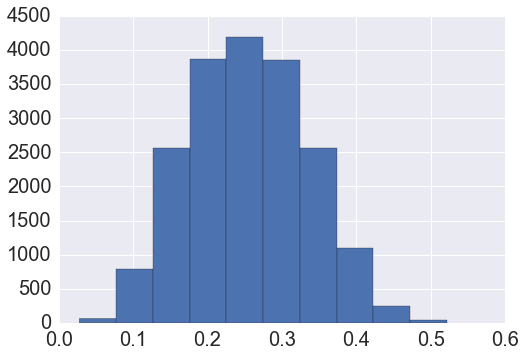

In [122]:
df[df['dep_delayed_15min'] == 'Y']['score'].hist()

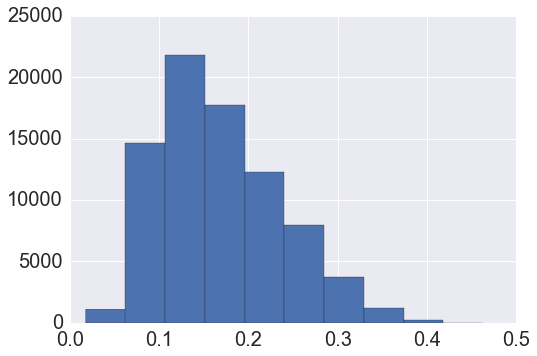

In [123]:

df[df['dep_delayed_15min'] == 'N']['score'].hist()

In [137]:
#convert departure times to hours make sure all are 4 digits, 730 am becomes 0730
df['DepHour'] = df['DepTime'].apply(lambda x: str(x).zfill(4)).apply(lambda x: int(x[0:2]))


In [139]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,score,DepHour
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N,0.139371,13
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N,0.105754,12
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y,0.249846,13
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N,0.166435,11
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N,0.145785,14


In [140]:
df['DepHour'].unique()

array([13, 12, 11, 14, 23, 18, 17, 21,  7, 15,  9, 20,  5,  6,  8, 16, 22,
        4, 10, 19,  0,  2,  1, 24,  3, 25])

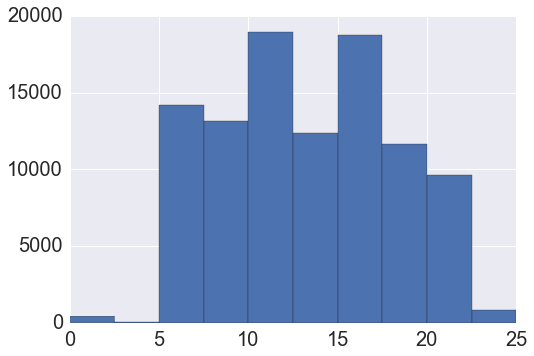

In [141]:
df['DepHour'].hist()

(array([  4.06000000e+02,   2.70000000e+01,   5.00000000e+00,
          2.70000000e+01,   7.99600000e+03,   6.20300000e+03,
          6.73200000e+03,   6.42100000e+03,   1.26290000e+04,
          6.33800000e+03,   6.32200000e+03,   6.07600000e+03,
          1.22510000e+04,   6.47500000e+03,   5.98300000e+03,
          5.67500000e+03,   7.81700000e+03,   1.80200000e+03,
          7.92000000e+02,   2.30000000e+01]),
 array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
         10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
         20.  ,  21.25,  22.5 ,  23.75,  25.  ]),
 <a list of 20 Patch objects>)

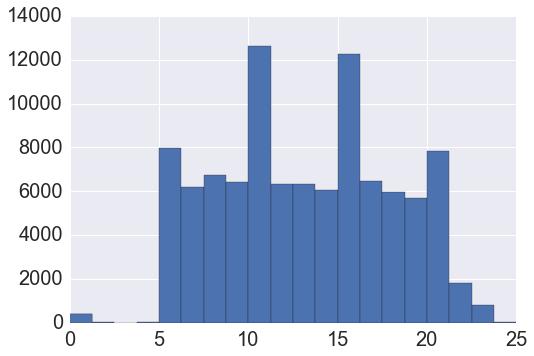

In [143]:
plt.hist(df['DepHour'], bins=20)

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


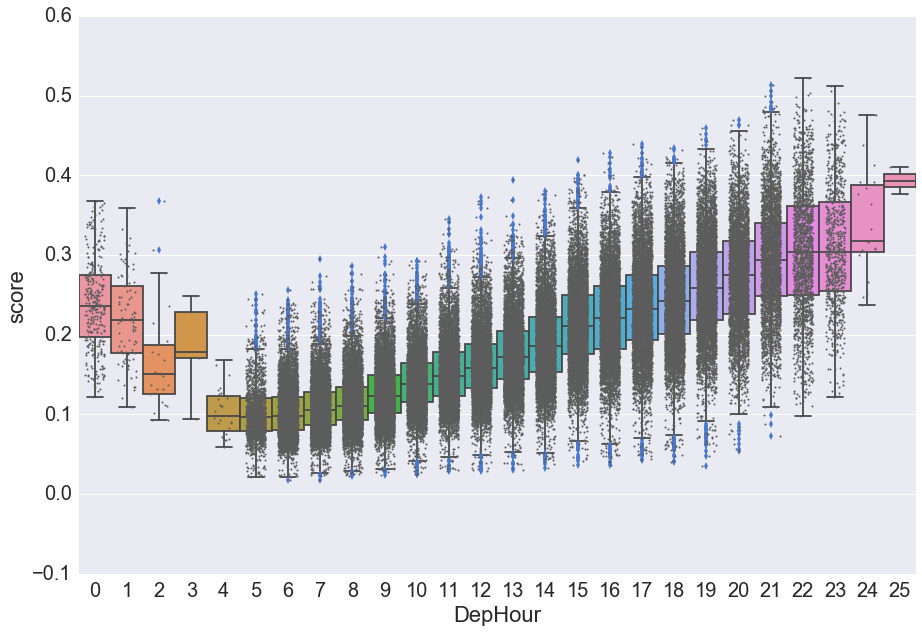

In [144]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="DepHour", y="score"
                    ,data=df.sort_values(by="DepHour")
                    ,orient='v', width=1)
sns.stripplot(x="DepHour", y="score"
                    ,data=df.sort_values(by="DepHour")
                    ,orient='v',jitter=0.3, size=1
                    , color="0.6",edgecolor="gray")